
# Recognising hand-written digits

This example shows how scikit-learn can be used to recognise images of
hand-written digits, from 0-9.


In [2]:
# Author: Gael Varoquaux <gael dot varoquaux at normalesup dot org>
# License: BSD 3 clause

# Standard scientific Python imports
import matplotlib.pyplot as plt
%matplotlib inline
# Import datasets, classifiers and performance metrics
from sklearn import datasets, svm, metrics
from sklearn.model_selection import train_test_split


## Digits dataset

The digits dataset consists of 8x8
pixel images of digits. The ``images`` attribute of the dataset stores
8x8 arrays of grayscale values for each image. We will use these arrays to
visualize the first 4 images. The ``target`` attribute of the dataset stores
the digit each image represents and this is included in the title of the 4
plots below.

Note: if we were working from image files (e.g., 'png' files), we would load
them using :func:`matplotlib.pyplot.imread`.



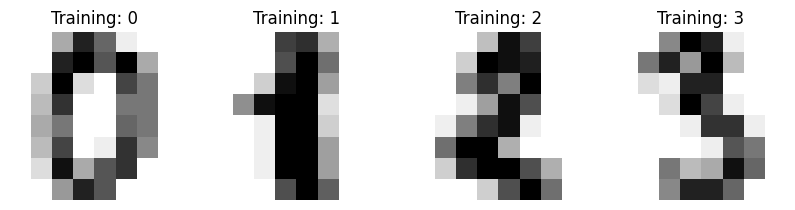

In [3]:
digits = datasets.load_digits()

_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title("Training: %i" % label)

## Classification

To apply a classifier on this data, we need to flatten the images, turning
each 2-D array of grayscale values from shape ``(8, 8)`` into shape
``(64,)``. Subsequently, the entire dataset will be of shape
``(n_samples, n_features)``, where ``n_samples`` is the number of images and
``n_features`` is the total number of pixels in each image.

We can then split the data into train and test subsets and fit a support
vector classifier on the train samples. The fitted classifier can
subsequently be used to predict the value of the digit for the samples
in the test subset.



In [4]:

# flatten the images
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

# Create a classifier: a support vector classifier
clf = svm.SVC(gamma=0.001)

# Split data into 50% train and 50% test subsets
X_train, X_test, y_train, y_test = train_test_split(
    data, digits.target, test_size=0.5, shuffle=False
)

# Learn the digits on the train subset
clf.fit(X_train, y_train)

# Predict the value of the digit on the test subset
predicted = clf.predict(X_test)
print(predicted)

[8 8 4 9 0 8 9 8 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 9 6 7 8 9
 0 9 5 5 6 5 0 9 8 9 8 4 1 7 7 3 9 1 2 7 8 2 0 1 2 6 3 3 7 3 3 4 6 6 6 4 9
 1 5 0 9 5 2 8 2 0 0 1 7 6 3 2 1 4 6 3 1 3 9 1 7 6 8 4 3 1 4 0 5 3 6 9 6 1
 7 5 4 4 7 2 8 2 2 5 7 9 5 4 4 9 0 8 9 8 0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6
 7 8 9 0 1 2 3 4 5 6 7 8 9 0 9 5 5 6 5 0 9 8 9 8 4 1 7 7 3 5 1 0 0 7 8 2 0
 1 2 6 3 3 7 3 3 4 6 6 6 9 9 1 5 0 9 5 2 8 2 0 0 1 7 6 3 2 1 5 4 6 3 1 7 9
 1 7 6 8 4 3 1 4 0 5 3 6 9 6 1 7 5 4 4 7 2 8 2 2 5 7 9 5 4 8 8 4 9 0 8 9 8
 0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9 0 9 5 5 6 5 0
 9 8 9 8 4 1 7 7 3 5 1 0 0 2 2 7 8 2 0 1 2 6 3 3 7 3 3 4 6 6 6 4 9 1 5 0 9
 5 2 8 2 0 0 1 7 6 3 2 2 7 4 6 3 1 3 9 1 7 6 8 4 3 1 4 0 5 3 6 9 6 8 7 5 4
 4 7 2 8 2 2 5 7 9 5 4 8 8 4 9 0 8 9 8 0 9 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7
 8 9 0 1 2 3 4 5 6 7 8 9 0 9 5 5 6 5 0 9 8 9 8 4 1 7 7 3 5 1 0 0 2 2 7 8 2
 0 1 2 6 3 3 7 3 3 4 6 6 6 4 9 1 5 0 9 6 2 8 3 0 0 1 7 6 3 2 1 7 4 6 3 1 3
 9 1 7 6 8 4 3 1 4 0 5 3 

Below we visualize the first 4 test samples and show their predicted
digit value in the title.



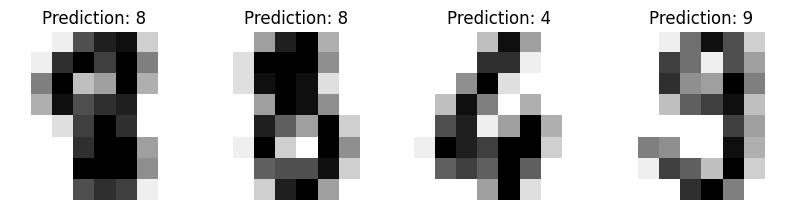

In [5]:
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, prediction in zip(axes, X_test, predicted):
    ax.set_axis_off()
    image = image.reshape(8, 8)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title(f"Prediction: {prediction}")

function `sklearn.metrics.classification_report` builds a text report showing
the main classification metrics.



In [6]:
print(
    f"Classification report for classifier {clf}:\n"
    f"{metrics.classification_report(y_test, predicted)}\n"
)

Classification report for classifier SVC(gamma=0.001):
              precision    recall  f1-score   support

           0       1.00      0.99      0.99        88
           1       0.99      0.97      0.98        91
           2       0.99      0.99      0.99        86
           3       0.98      0.87      0.92        91
           4       0.99      0.96      0.97        92
           5       0.95      0.97      0.96        91
           6       0.99      0.99      0.99        91
           7       0.96      0.99      0.97        89
           8       0.94      1.00      0.97        88
           9       0.93      0.98      0.95        92

    accuracy                           0.97       899
   macro avg       0.97      0.97      0.97       899
weighted avg       0.97      0.97      0.97       899




## Understanding the classification report

The classification report provides a summary of the performance of the Support Vector Classifier (SVC) on the test set of handwritten digits.  Let's break down the key metrics:

* **Precision:**  For each digit (0-9), precision represents the accuracy of positive predictions.  It answers: *Of all the images the model predicted to be a certain digit, what proportion were actually that digit?*  A high precision means the model is not often incorrectly labeling images.

* **Recall (Sensitivity):** For each digit, recall represents the ability of the model to find all the actual positive instances. It answers: *Of all the images that are actually a certain digit, what proportion did the model correctly identify?*  High recall indicates that the model doesn't miss many actual instances of a digit.

* **F1-score:** The F1-score is the harmonic mean of precision and recall. It provides a single measure that balances both metrics.  It's useful when you want to consider both false positives and false negatives.  A high F1-score means the model has both good precision and recall.

* **Support:**  The support is the number of actual occurrences of each digit in the test set.

* **Macro Average:** This calculates the average of precision, recall, and F1-score across all classes (digits 0-9). It treats all classes equally, regardless of their frequency in the dataset.

* **Weighted Average:** This calculates the average of precision, recall, and F1-score across all classes, weighted by their support (number of instances).  It considers the class frequencies in the dataset.  This is often a more informative metric when classes are imbalanced.

* **Accuracy:**  This is the overall accuracy of the model on the test set, showing the proportion of correctly classified images.


**In summary:** The classification report gives you a detailed breakdown of how well the SVC performed for each digit, considering both its precision and recall. The macro and weighted averages provide overall performance summaries, with the weighted average being more relevant if there are class imbalances (some digits appearing much more often than others).  A high accuracy confirms overall good performance.


We can also plot a `confusion matrix` of the
true digit values and the predicted digit values.



Confusion matrix:
[[0.98863636 0.         0.         0.         0.01136364 0.
  0.         0.         0.         0.        ]
 [0.         0.96703297 0.01098901 0.         0.         0.
  0.         0.         0.01098901 0.01098901]
 [0.         0.         0.98837209 0.01162791 0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.86813187 0.         0.03296703
  0.         0.04395604 0.05494505 0.        ]
 [0.         0.         0.         0.         0.95652174 0.
  0.         0.         0.         0.04347826]
 [0.         0.         0.         0.         0.         0.96703297
  0.01098901 0.         0.         0.02197802]
 [0.         0.01098901 0.         0.         0.         0.
  0.98901099 0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.01123596
  0.         0.98876404 0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         1.         0.     

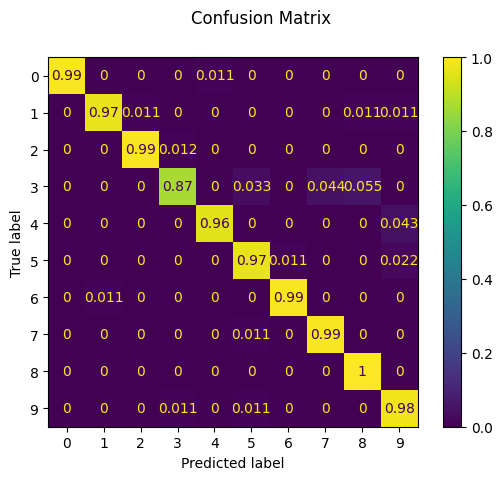

In [7]:

disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, predicted, normalize='true')
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()

In [8]:
help(metrics.ConfusionMatrixDisplay.from_predictions)

Help on method from_predictions in module sklearn.metrics._plot.confusion_matrix:

from_predictions(y_true, y_pred, *, labels=None, sample_weight=None, normalize=None, display_labels=None, include_values=True, xticks_rotation='horizontal', values_format=None, cmap='viridis', ax=None, colorbar=True, im_kw=None, text_kw=None) class method of sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay
    Plot Confusion Matrix given true and predicted labels.

    Read more in the :ref:`User Guide <confusion_matrix>`.

    .. versionadded:: 1.0

    Parameters
    ----------
    y_true : array-like of shape (n_samples,)
        True labels.

    y_pred : array-like of shape (n_samples,)
        The predicted labels given by the method `predict` of an
        classifier.

    labels : array-like of shape (n_classes,), default=None
        List of labels to index the confusion matrix. This may be used to
        reorder or select a subset of labels. If `None` is given, those
        that 

### Find incorrectly classified images


In [9]:
import numpy as np

incorrect_predictions = np.where(y_test != predicted)[0]
print("Incorrection predictions:", len(incorrect_predictions))
print(incorrect_predictions)

Incorrection predictions: 28
[ 32  53 197 215 220 344 366 390 463 466 653 675 704 705 707 713 730 760
 762 764 782 792 814 828 829 831 832 867]


### Display incorrectly classified images

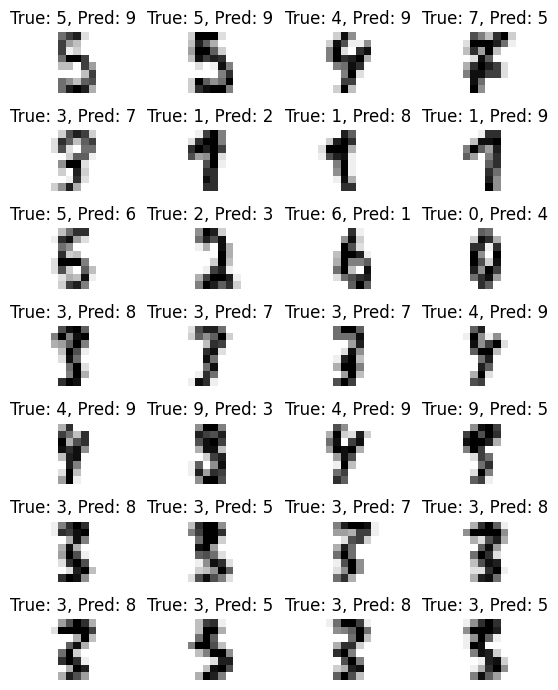

In [10]:

num_incorrect = len(incorrect_predictions)
num_cols = 4
num_rows = min(7, (num_incorrect + 3) // 4)  # Calculate rows, ensuring at least one row

fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(6, num_rows))
axes = axes.flatten() # Convert to a 1D array for easier iteration

for i, idx in enumerate(incorrect_predictions[:num_rows * num_cols]): # Limit to fit the grid
    if i < num_incorrect: # Avoid index errors if fewer than num_rows * num_cols images
      ax = axes[i]
      ax.set_axis_off()
      image = X_test[idx].reshape(8, 8)
      ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
      ax.set_title(f"True: {y_test[idx]}, Pred: {predicted[idx]}")
    else:
      axes[i].axis('off') # Hide any unused subplots

plt.tight_layout()
plt.show()

### Practical:
Use the digits dataset in the previous notebook, i.e., apply all the classifiers and compare their performance through the graphs.

Reference: https://scikit-learn.org